In [4]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
dataset_path = 'TrafficCopy21.csv'
df = pd.read_csv(dataset_path)

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Check for missing values
print(df.isnull().sum())


Time                0
Node                0
CarCount            0
BikeCount           0
BusCount            0
TruckCount          0
TrafficSituation    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16200\94943986.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [5]:
# Assuming you have a DataFrame 'df' with columns 'CarCount', 'BikeCount', and 'TruckCount'

# Create lag features (basically it stores the data of 1 hour behind like for bikecount lag will store the count of bikes 1 hour behind)
df['CarCount_lag1'] = df['CarCount'].shift(1)
df['BikeCount_lag1'] = df['BikeCount'].shift(1)
df['TruckCount_lag1'] = df['TruckCount'].shift(1)

# Interpolate missing values
df['CarCount_lag1'].interpolate(method='linear', inplace=True)
df['BikeCount_lag1'].interpolate(method='linear', inplace=True)
df['TruckCount_lag1'].interpolate(method='linear', inplace=True)

df.dropna(inplace=True)

# Check if any null values remain
print(f"Null values in CarCount_lag1: {df['CarCount_lag1'].isnull().sum()}")
print(f"Null values in BikeCount_lag1: {df['BikeCount_lag1'].isnull().sum()}")
print(f"Null values in TruckCount_lag1: {df['TruckCount_lag1'].isnull().sum()}")

# Now you can proceed with training your model using the interpolated lag features
# ...
# Your modeling code here
# ...


Null values in CarCount_lag1: 0
Null values in BikeCount_lag1: 0
Null values in TruckCount_lag1: 0


In [19]:
df.head()

,Time,Node,CarCount,BikeCount,BusCount,TruckCount,TrafficSituation,CarCount_lag1,BikeCount_lag1,TruckCount_lag1,TotalVehicleCount,bikeTruck,carBike
1,2024-02-08 01:00:00,10,57,6,15,16,normal,31.0,0.0,4.0,79,96,0.0
2,2024-02-08 02:00:00,10,51,0,9,7,low,57.0,6.0,16.0,58,0,342.0
3,2024-02-08 03:00:00,10,50,0,3,0,low,51.0,0.0,7.0,50,0,0.0
4,2024-02-08 04:00:00,10,111,28,20,3,normal,50.0,0.0,0.0,142,84,0.0
5,2024-02-08 05:00:00,10,94,20,8,7,normal,111.0,28.0,3.0,121,140,3108.0


In [20]:
#xgboost model just xgboost no feature engineering at all
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing features and target variable
# Features and target variable
X = df[['Node','CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb = XGBClassifier(n_estimators=4000, learning_rate=0.000001, max_depth=1, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.67


In [7]:
#svm model (no feature engineering)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.5, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate model performance
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Validation Accuracy: {accuracy_svm:.2f}")


SVM Validation Accuracy: 0.66


In [8]:
#naive bayes ( no feature engineering)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.9, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_nb = nb_model.predict(X_val)

# Evaluate model performance
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Validation Accuracy: {accuracy_nb:.2f}")


Naive Bayes Validation Accuracy: 0.60


In [9]:
#logistic regression ( no feature engineering)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg_model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.66


In [10]:
# xgboost with feature engineering of total vehicle count
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Feature engineering: Create a new feature 'TotalVehicleCount'
df['TotalVehicleCount'] = df['CarCount'] + df['BikeCount'] + df['TruckCount']

# Features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1', 'TotalVehicleCount']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb = XGBClassifier(n_estimators=400, learning_rate=0.0365680356724992, max_depth=3)
xgb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.77


In [16]:
# svm with feature engineering of total vehicle count
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Feature engineering: Create a new feature 'TotalVehicleCount'
df['TotalVehicleCount'] = df['CarCount'] + df['BikeCount'] + df['TruckCount']

# Features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1', 'TotalVehicleCount']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear',C=6.366091893225512, gamma=0.4105870811665385, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate model performance
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Validation Accuracy: {accuracy_svm:.2f}")


SVM Validation Accuracy: 0.75


In [ ]:
#hyperparameter tuning for xgboost
#grid search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming X_train and y_train are your training data
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_grid = grid_search.best_params_
print("Best hyperparameters (grid search):", best_params_grid)


Best hyperparameters (grid search): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
#hyperparameter tuning with random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Assuming X_train and y_train are your training data
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Perform random search
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_xgb = random_search_xgb.best_params_
print("Best hyperparameters (random search):", best_params_random_xgb)


Best hyperparameters (random search): {'learning_rate': 0.016789379798500474, 'max_depth': 5, 'n_estimators': 100}


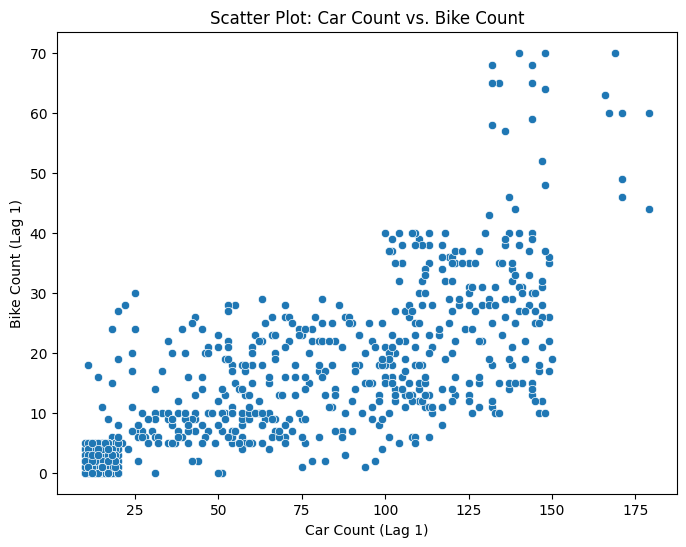

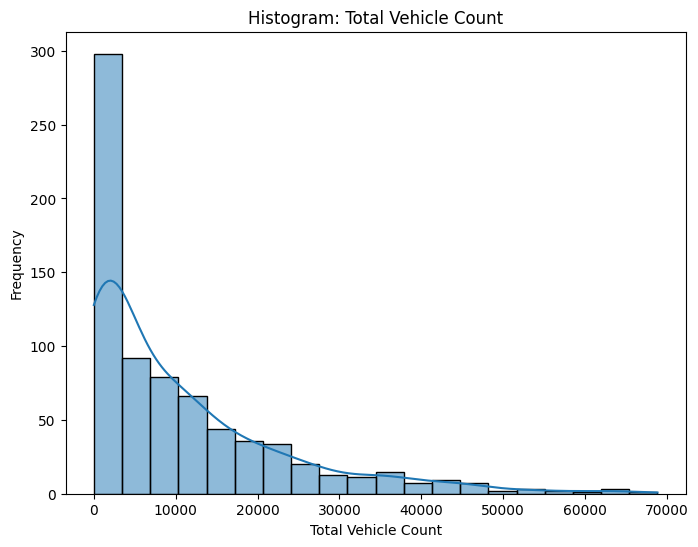

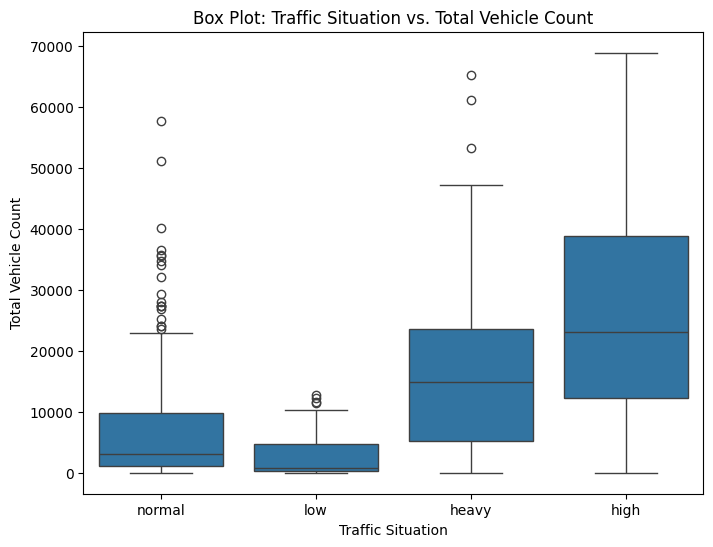

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


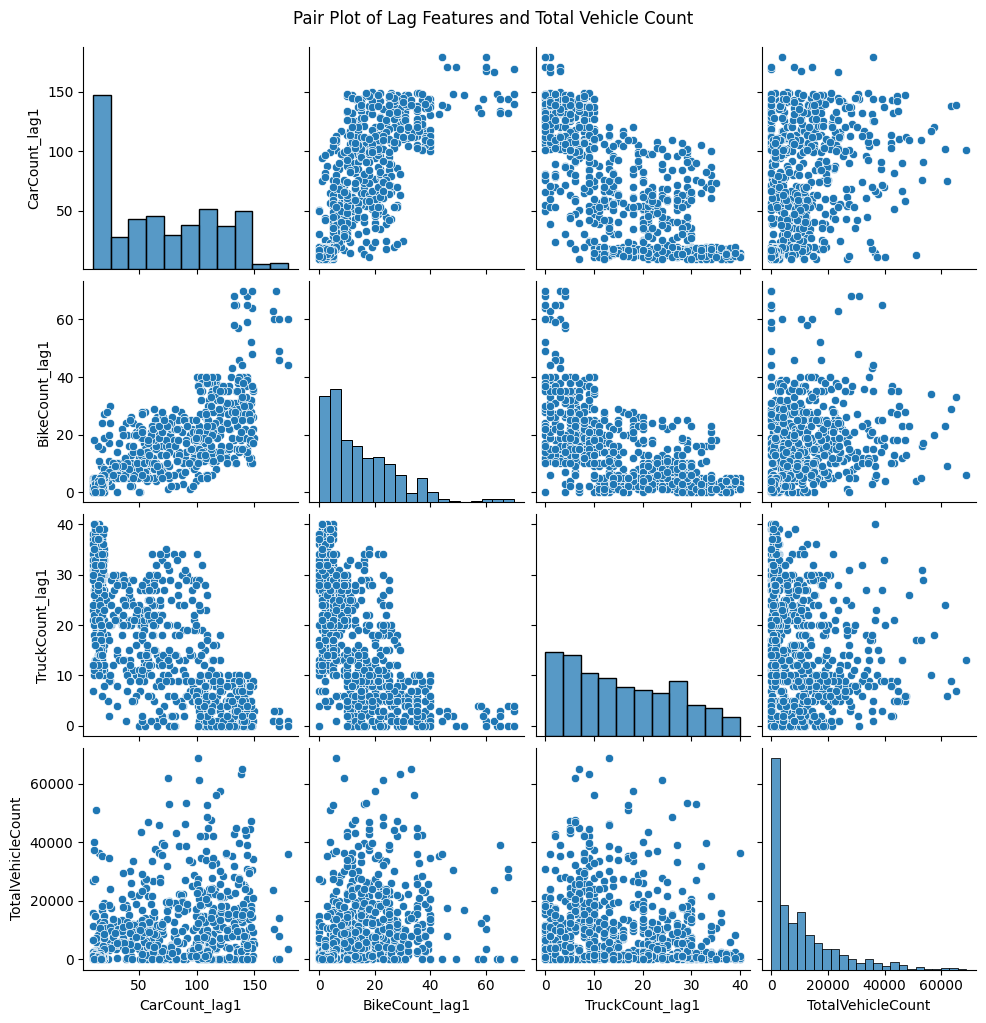

In [12]:
# data visualization using seaborn and matplotlib for feature engineering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic scatter plot (e.g., CarCount_lag1 vs. BikeCount_lag1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CarCount_lag1', y='BikeCount_lag1', data=df)
plt.xlabel('Car Count (Lag 1)')
plt.ylabel('Bike Count (Lag 1)')
plt.title('Scatter Plot: Car Count vs. Bike Count')
plt.show()

# Histogram of TotalVehicleCount
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalVehicleCount'], bins=20, kde=True)
plt.xlabel('Total Vehicle Count')
plt.ylabel('Frequency')
plt.title('Histogram: Total Vehicle Count')
plt.show()

# Box plot for TrafficSituation vs. TotalVehicleCount
plt.figure(figsize=(8, 6))
sns.boxplot(x='TrafficSituation', y='TotalVehicleCount', data=df)
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.title('Box Plot: Traffic Situation vs. Total Vehicle Count')
plt.show()

# Pair plot for multiple features
sns.pairplot(df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1', 'TotalVehicleCount']])
plt.suptitle('Pair Plot of Lag Features and Total Vehicle Count', y=1.02)
plt.show()


In [17]:
#classification report for xgboost model with feature engineering
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Feature engineering: Create a new feature 'TotalVehicleCount'
df['TotalVehicleCount'] = df['CarCount'] + df['BikeCount'] + df['TruckCount']
df['bikeTruck'] = df['BikeCount'] * df['TruckCount'] #did this because there is non-linear relationship between bike and truck count
df['carBike'] = df['CarCount_lag1'] * df['BikeCount_lag1'] #did this because there is some linear relationship between car and bike count

# Features and target variable
X = df[['CarCount_lag1', 'BikeCount_lag1', 'TruckCount_lag1', 'TotalVehicleCount', 'bikeTruck','carBike']]
y = df['TrafficSituation']

# Encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb = XGBClassifier(n_estimators=400, learning_rate=0.0365680356724992, max_depth=3)
xgb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))

#best result is with xgboost model with feature engineering


Validation Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1 Score: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.64      0.82      0.72        11
           2       0.58      0.44      0.50        16
           3       0.85      0.85      0.85        82

    accuracy                           0.83       149
   macro avg       0.75      0.76      0.75       149
weighted avg       0.82      0.83      0.82       149



In [18]:
import pickle

# Save the model to a file
pickle.dump(xgb, open("xgb_model.pkl", "wb"))
